<a href="https://colab.research.google.com/github/kalyankalluri999/Disseration/blob/main/Disseration_Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [291]:
Liver_dataset = pd.read_csv('Liver_Patient_dataset.csv')

In [292]:
Liver_dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [293]:
Liver_dataset.shape

(576, 11)

In [294]:
Liver_dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [295]:
Liver_dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

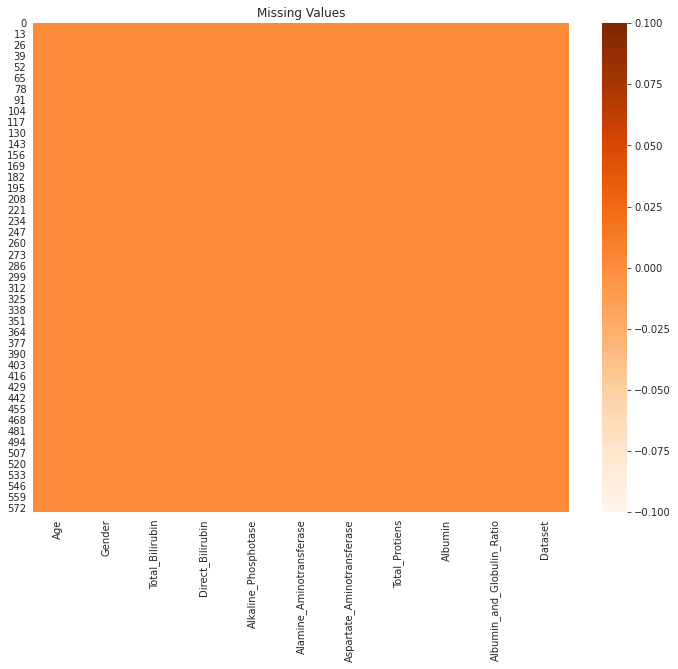

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) 
sns.heatmap(Liver_dataset.isna(), cmap='Oranges')
plt.title("Missing Values") 
plt.show()

**Exploratory Data Analysis**

In [296]:
Liver_dataset.dtypes[Liver_dataset.dtypes=='object']

Gender    object
dtype: object

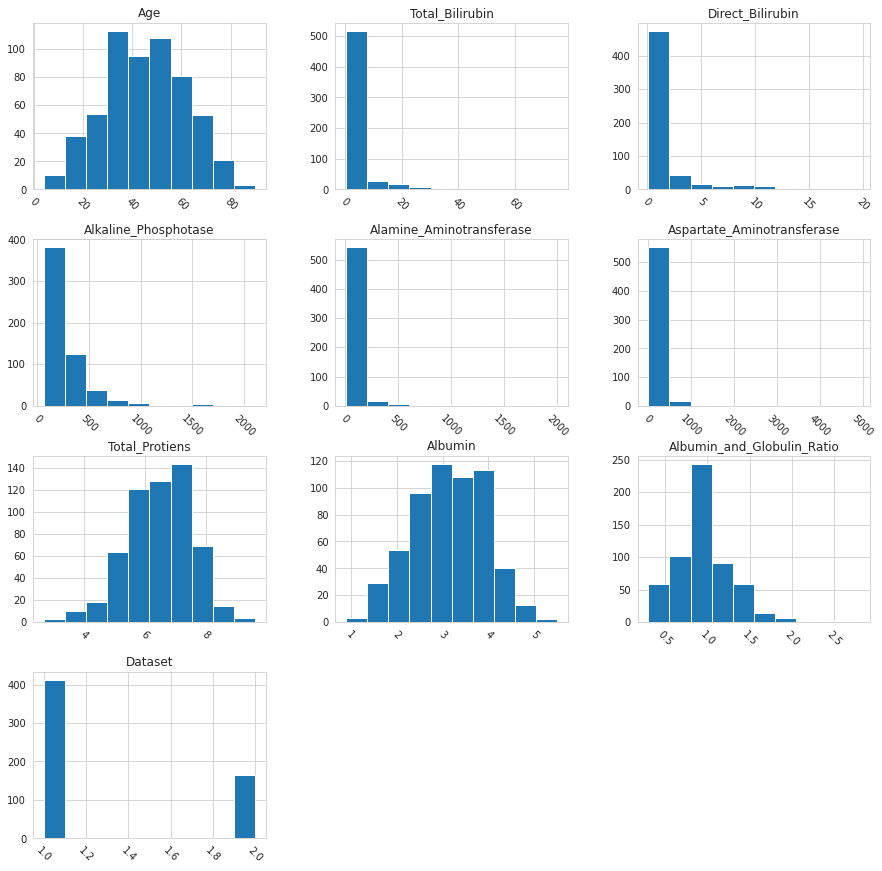

In [212]:
# Plot histogram grid
Liver_dataset.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress
# Clear the text "residue"
plt.show()

In [213]:
Liver_dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,44.855903,3.321875,1.497396,291.895833,81.267361,110.432292,6.486632,3.139757,0.946094,1.284722
std,16.220601,6.242951,2.823309,244.079124,183.640229,290.562050,1.081920,0.795902,0.319633,0.451674
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.500000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value**

**Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinien**t

In [214]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1
Liver_dataset['Dataset'] = Liver_dataset['Dataset'].map(partition)

**Distribution of categorical data**

In [215]:
Liver_dataset.describe(include=['object'])

,Gender
count,576
unique,2
top,Male
freq,436


**Bar plots for categorical Features**

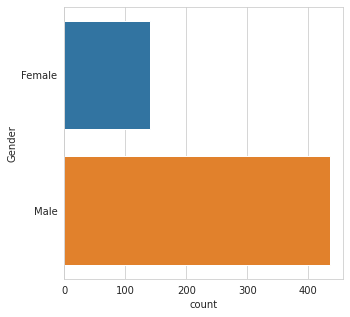

In [216]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=Liver_dataset)

In [217]:
Liver_dataset[Liver_dataset['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


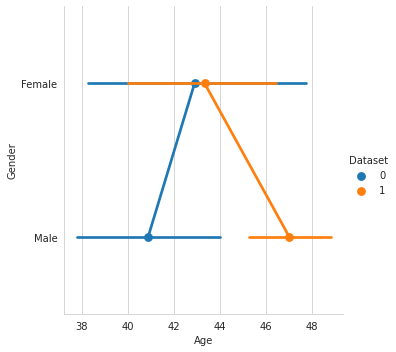

In [218]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=Liver_dataset);

**Age seems to be a factor for liver disease for both male and female genders**

Number of patients that are male:  436
Number of patients that are female:  140


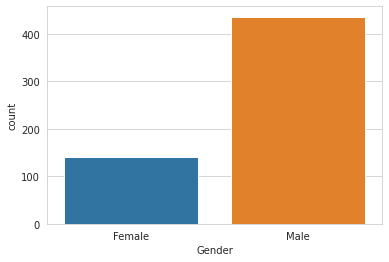

In [219]:
sns.countplot(data=Liver_dataset, x = 'Gender', label='Count')
M, F = Liver_dataset['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

**There are more male patients than female patients**

**Label Male as 0 and Female as 1**

In [220]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1
Liver_dataset['Gender'] = Liver_dataset['Gender'].map(partition)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


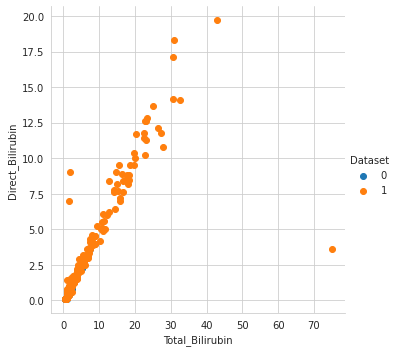

In [221]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(Liver_dataset, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


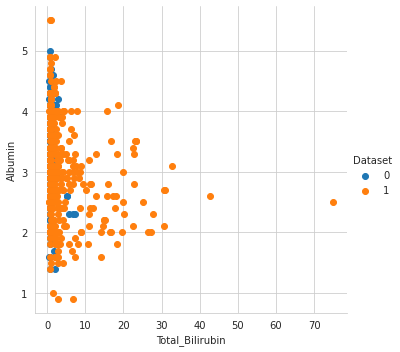

In [222]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(Liver_dataset, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


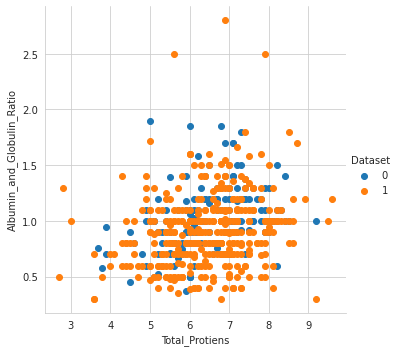

In [223]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(Liver_dataset, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [224]:
Liver_dataset.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.058648,0.010032,0.005589,0.076967,-0.088669,-0.020943,-0.193760,-0.266891,-0.213166,0.131357
Gender,-0.058648,1.000000,-0.088746,-0.099918,0.028175,-0.081851,-0.079534,0.093127,0.094846,0.005157,-0.081967
Total_Bilirubin,0.010032,-0.088746,1.000000,0.874444,0.205434,0.213179,0.237214,-0.009568,-0.222937,-0.205758,0.221163
Direct_Bilirubin,0.005589,-0.099918,0.874444,1.000000,0.233657,0.232991,0.256910,-0.001811,-0.229315,-0.199426,0.247082
Alkaline_Phosphotase,0.076967,0.028175,0.205434,0.233657,1.000000,0.124553,0.166622,-0.029416,-0.164300,-0.233326,0.183275
Alamine_Aminotransferase,-0.088669,-0.081851,0.213179,0.232991,0.124553,1.000000,0.791921,-0.043829,-0.029205,-0.001657,0.164107
Aspartate_Aminotransferase,-0.020943,-0.079534,0.237214,0.256910,0.166622,0.791921,1.000000,-0.027267,-0.085554,-0.069293,0.152551
Total_Protiens,-0.193760,0.093127,-0.009568,-0.001811,-0.029416,-0.043829,-0.027267,1.000000,0.784022,0.243747,-0.034494
Albumin,-0.266891,0.094846,-0.222937,-0.229315,-0.164300,-0.029205,-0.085554,0.784022,1.000000,0.694283,-0.159550
Albumin_and_Globulin_Ratio,-0.213166,0.005157,-0.205758,-0.199426,-0.233326,-0.001657,-0.069293,0.243747,0.694283,1.000000,-0.162874



**Correlations**

1. Finally, let's take a look at the relationships between numeric features and other numeric features.

2. Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.

3. Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.

4. Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

5. Correlations near -1 or 1 indicate a strong relationship.

6. Those closer to 0 indicate a weak relationship.

7. 0 indicates no relationship.

In [225]:
Liver_dataset.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.058648,0.010032,0.005589,0.076967,-0.088669,-0.020943,-0.193760,-0.266891,-0.213166,0.131357
Gender,-0.058648,1.000000,-0.088746,-0.099918,0.028175,-0.081851,-0.079534,0.093127,0.094846,0.005157,-0.081967
Total_Bilirubin,0.010032,-0.088746,1.000000,0.874444,0.205434,0.213179,0.237214,-0.009568,-0.222937,-0.205758,0.221163
Direct_Bilirubin,0.005589,-0.099918,0.874444,1.000000,0.233657,0.232991,0.256910,-0.001811,-0.229315,-0.199426,0.247082
Alkaline_Phosphotase,0.076967,0.028175,0.205434,0.233657,1.000000,0.124553,0.166622,-0.029416,-0.164300,-0.233326,0.183275
Alamine_Aminotransferase,-0.088669,-0.081851,0.213179,0.232991,0.124553,1.000000,0.791921,-0.043829,-0.029205,-0.001657,0.164107
Aspartate_Aminotransferase,-0.020943,-0.079534,0.237214,0.256910,0.166622,0.791921,1.000000,-0.027267,-0.085554,-0.069293,0.152551
Total_Protiens,-0.193760,0.093127,-0.009568,-0.001811,-0.029416,-0.043829,-0.027267,1.000000,0.784022,0.243747,-0.034494
Albumin,-0.266891,0.094846,-0.222937,-0.229315,-0.164300,-0.029205,-0.085554,0.784022,1.000000,0.694283,-0.159550
Albumin_and_Globulin_Ratio,-0.213166,0.005157,-0.205758,-0.199426,-0.233326,-0.001657,-0.069293,0.243747,0.694283,1.000000,-0.162874


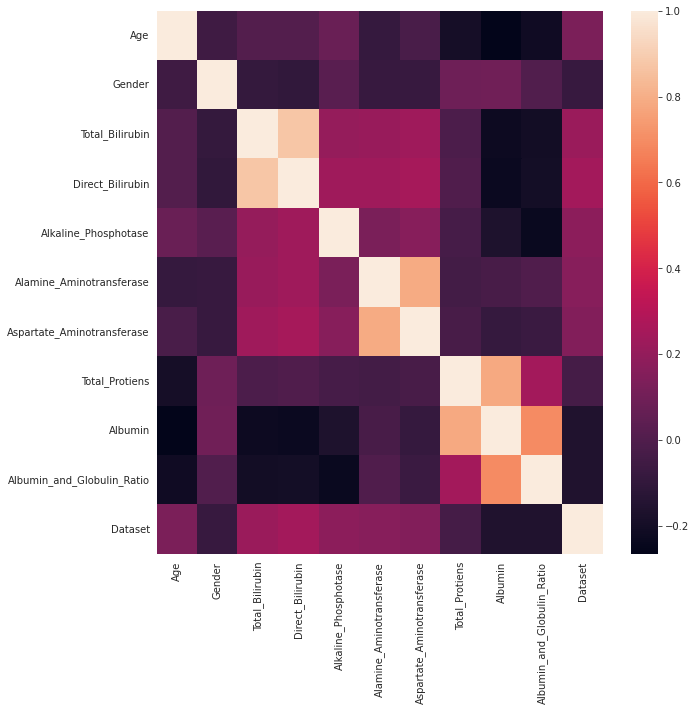

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(Liver_dataset.corr())

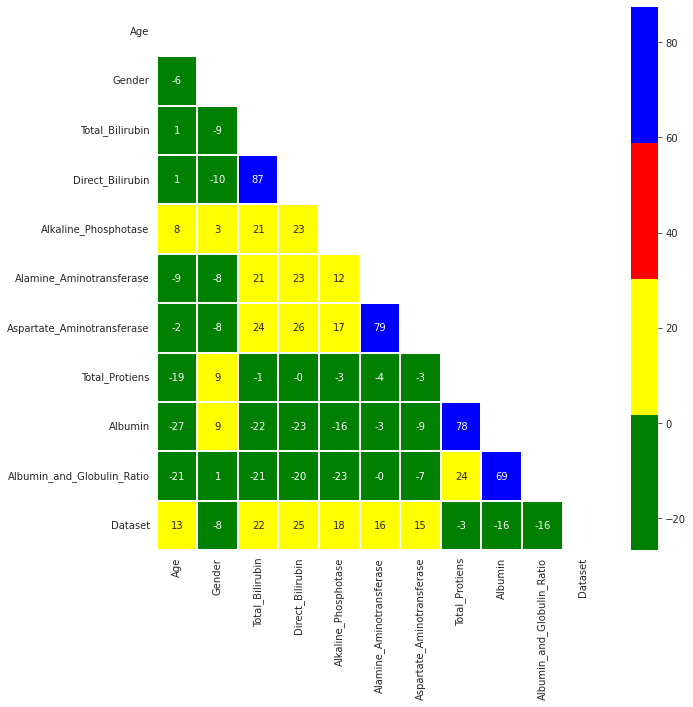

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mask=np.zeros_like(Liver_dataset.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(Liver_dataset.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [228]:
dataset = Liver_dataset.drop_duplicates()
print( Liver_dataset.shape )

(576, 11)


**There were 13 duplicates**

**Removing Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


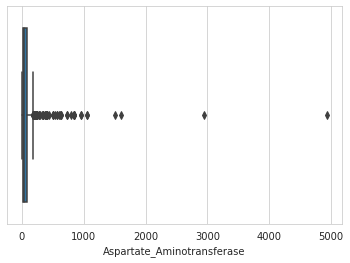

In [229]:
sns.boxplot(Liver_dataset.Aspartate_Aminotransferase)

In [230]:
Liver_dataset.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [231]:
Liver_dataset = Liver_dataset[Liver_dataset.Aspartate_Aminotransferase <=3000 ]
Liver_dataset.shape

(575, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


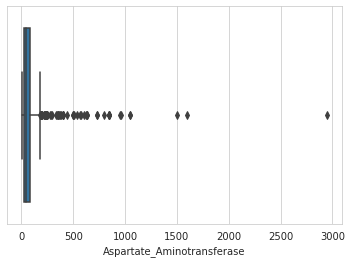

In [232]:
sns.boxplot(Liver_dataset.Aspartate_Aminotransferase)


In [233]:
Liver_dataset.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
199    1050
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [234]:
Liver_dataset = Liver_dataset[Liver_dataset.Aspartate_Aminotransferase <=2500 ]
Liver_dataset.shape

(574, 11)

In [235]:
Liver_dataset.isnull().values.any()

False

In [236]:
Liver_dataset=Liver_dataset.dropna(how='any')  

In [237]:
Liver_dataset.shape


(574, 11)

In [238]:
Liver_dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Machine Learning Models**

**Data Preparation**

In [239]:
X = Liver_dataset.drop(columns = 'Dataset', axis=1)
y = Liver_dataset['Dataset']

In [240]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [241]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [242]:
# Using sklearn library we are importing the train_test_split module which can help to split data equally in to train and test data
from sklearn.model_selection import train_test_split

# Split X and y into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [243]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(401, 10) (173, 10) (401,) (173,)


**Data standardization**

In [244]:
train_mean = X_train.mean()
train_std = X_train.std()

In [245]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [246]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02
mean,-2.170611e-16,-6.866217e-17,1.107454e-16,3.322363e-17,-4.429818e-18,8.859635e-18,-8.859635e-18,1.204910e-15,-5.315781e-17,2.303505e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.518581e+00,-5.564920e-01,-4.575580e-01,-4.956459e-01,-9.323222e-01,-4.108520e-01,-5.193433e-01,-3.441092e+00,-2.744612e+00,-2.016787e+00
25%,-6.850844e-01,-5.564920e-01,-3.979766e-01,-4.610017e-01,-4.725568e-01,-3.384549e-01,-4.316046e-01,-7.064945e-01,-6.411808e-01,-7.449964e-01
50%,-1.280247e-02,-5.564920e-01,-3.681860e-01,-4.263574e-01,-3.446221e-01,-2.660578e-01,-3.380166e-01,2.273148e-02,-2.252464e-02,-1.091012e-01
75%,7.817126e-01,-5.564920e-01,-1.298606e-01,-7.991502e-02,7.198321e-03,-1.091974e-01,-5.725263e-02,6.608042e-01,7.198627e-01,5.267940e-01
max,2.737442e+00,1.792490e+00,1.065436e+01,6.294625e+00,7.251501e+00,9.664410e+00,8.780963e+00,2.848482e+00,2.947025e+00,5.931903e+00


In [247]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [248]:
# Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,-0.074626,0.054515,-0.089049,-0.055884,-0.073731,-0.044263,-0.032807,0.036431,0.092624,0.125959
std,0.970888,1.033484,0.734871,0.918284,0.889228,0.839582,1.044919,0.959506,0.951482,1.047319
min,-2.335231,-0.556492,-0.442663,-0.495646,-0.792394,-0.410852,-0.507645,-3.349939,-2.125955,-1.857813
25%,-0.807318,-0.556492,-0.397977,-0.461002,-0.500543,-0.320356,-0.419906,-0.433035,-0.517450,-0.427049
50%,-0.012802,-0.556492,-0.383081,-0.426357,-0.364612,-0.253992,-0.332167,0.113885,0.101207,0.081667
75%,0.720596,1.792490,-0.174547,-0.114559,-0.016789,-0.097131,-0.109896,0.569651,0.843594,0.526794
max,1.820694,1.792490,4.338740,4.354548,6.395938,7.070181,8.196038,2.757329,2.204637,4.978060


**Logistic Regression**

In [249]:
# Using Skleran library we are importing logistic algorithm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

LR_AL = LogisticRegression()

LR_AL.fit(X_train, y_train)

LogisticRegression()

In [250]:
# model predictions
y_pred_lr = LR_AL.predict(X_test)

In [251]:
print(accuracy_score(y_train, LR_AL.predict(X_train)))
LR_Accuracy = accuracy_score(y_test, LR_AL.predict(X_test))
print(LR_Accuracy )

0.7406483790523691
0.6936416184971098


In [252]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

[[ 11  45]
 [  8 109]]


In [253]:
# classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.20      0.29        56
           1       0.71      0.93      0.80       117

    accuracy                           0.69       173
   macro avg       0.64      0.56      0.55       173
weighted avg       0.67      0.69      0.64       173



**KNN**

In [254]:
from sklearn.neighbors import KNeighborsClassifier

KNN_AL = KNeighborsClassifier()

KNN_AL.fit(X_train, y_train)

KNeighborsClassifier()

In [255]:
# model predictions 
KNN_AL_Predict = KNN_AL.predict(X_test)

In [256]:
# accuracy score

print(accuracy_score(y_train, KNN_AL.predict(X_train)))
KNN_ACCURACY = accuracy_score(y_test, KNN_AL.predict(X_test))
print(KNN_ACCURACY)

0.8079800498753117
0.6011560693641619


In [257]:
# confusion matrix
print(confusion_matrix(y_test, KNN_AL_Predict))

[[15 41]
 [28 89]]


In [258]:
# classification report
print(classification_report(y_test, KNN_AL_Predict))

              precision    recall  f1-score   support

           0       0.35      0.27      0.30        56
           1       0.68      0.76      0.72       117

    accuracy                           0.60       173
   macro avg       0.52      0.51      0.51       173
weighted avg       0.58      0.60      0.59       173



**SVM**

In [259]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVC_AL = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

gd_search = GridSearchCV(SVC_AL, parameters)
gd_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [260]:
# best parameters
gd_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [261]:
# best score 
gd_search.best_score_

0.7306790123456791

In [262]:
SVC_AL = SVC(C = 0.01, gamma = 0.0001, probability=True)
SVC_AL.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [263]:
# model predictions 
SVC_pred = SVC_AL.predict(X_test)

In [264]:
# accuracy score

print(accuracy_score(y_train, SVC_AL.predict(X_train)))
SVC_Accuracy = accuracy_score(y_test, SVC_AL.predict(X_test))
print(SVC_Accuracy)

0.7306733167082294
0.6763005780346821


In [265]:
# confusion matrix
print(confusion_matrix(y_test, SVC_pred))

[[  0  56]
 [  0 117]]


In [266]:
# classification report
print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.68      1.00      0.81       117

    accuracy                           0.68       173
   macro avg       0.34      0.50      0.40       173
weighted avg       0.46      0.68      0.55       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree**

In [267]:
from sklearn.tree import DecisionTreeClassifier

DT_AL = DecisionTreeClassifier()
DT_AL.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree
DT_Accuracy = accuracy_score(y_test, DT_AL.predict(X_test))

print(f" The Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, DT_AL.predict(X_train))}")
print(f" The Test Accuracy of Decision Tree Classifier is {DT_Accuracy} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, DT_AL.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, DT_AL.predict(X_test))}")

 The Training Accuracy of Decision Tree Classifier is 1.0
 The Test Accuracy of Decision Tree Classifier is 0.6184971098265896 

Confusion Matrix :- 
[[19 37]
 [29 88]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.40      0.34      0.37        56
           1       0.70      0.75      0.73       117

    accuracy                           0.62       173
   macro avg       0.55      0.55      0.55       173
weighted avg       0.60      0.62      0.61       173



In [268]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
gd_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

gd_search_dtc = GridSearchCV(DT_AL, gd_param, cv = 24, n_jobs = -1, verbose = 1)
gd_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5760 fits failed out of a total of 28800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a 

GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [269]:
# best parameters and best score
print(gd_search_dtc.best_params_)
print(gd_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.7432598039215687


In [270]:
from pandas.plotting import deregister_matplotlib_converters
# best estimator

deregister_matplotlib_converters = gd_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

DT_ACC = accuracy_score(y_test, DT_AL.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, DT_AL.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {DT_ACC} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, DT_AL.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, DT_AL.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6184971098265896 

Confusion Matrix :- 
[[19 37]
 [29 88]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.40      0.34      0.37        56
           1       0.70      0.75      0.73       117

    accuracy                           0.62       173
   macro avg       0.55      0.55      0.55       173
weighted avg       0.60      0.62      0.61       173



**Random Forest**

In [271]:

from sklearn.ensemble import RandomForestClassifier

random_al = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)

random_al.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [272]:
y_random_al = random_al.predict(X_test)

In [273]:
# accuracy score

print(accuracy_score(y_train, random_al.predict(X_train)))

random_al_acc = accuracy_score(y_test, y_random_al)

print(random_al_acc)

0.9451371571072319
0.7109826589595376


In [274]:
# confusion matrix
print(confusion_matrix(y_test, y_random_al))

[[ 14  42]
 [  8 109]]


In [275]:
# classification report
print(classification_report(y_test, y_random_al))

              precision    recall  f1-score   support

           0       0.64      0.25      0.36        56
           1       0.72      0.93      0.81       117

    accuracy                           0.71       173
   macro avg       0.68      0.59      0.59       173
weighted avg       0.69      0.71      0.67       173



**Gradient Boosting Classifier**

In [276]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_AL = GradientBoostingClassifier()
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

gd_search_gbc = GridSearchCV(GBC_AL, parameters, cv = 20, n_jobs = -1, verbose = 1)
gd_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [277]:
# best parameters 
gd_search_gbc.best_params_

{'learning_rate': 0.001, 'loss': 'deviance', 'n_estimators': 100}

In [278]:
# best score
gd_search_gbc.best_score_

0.7307142857142855

In [279]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [280]:
Y_PRED_GBC = gbc.predict(X_test)


In [281]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))
GBC_ACCURACY = accuracy_score(y_test, Y_PRED_GBC)
print(GBC_ACCURACY)

0.9276807980049875
0.7225433526011561


In [282]:
# confusion matrix
print(confusion_matrix(y_test, Y_PRED_GBC))

[[ 18  38]
 [ 10 107]]


In [283]:
# classification report

print(classification_report(y_test, Y_PRED_GBC))

              precision    recall  f1-score   support

           0       0.64      0.32      0.43        56
           1       0.74      0.91      0.82       117

    accuracy                           0.72       173
   macro avg       0.69      0.62      0.62       173
weighted avg       0.71      0.72      0.69       173



**XGBoost**

In [284]:
from xgboost import XGBClassifier 
XGB_AL = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 300)
XGB_AL.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=100, n_estimators=300)

In [285]:
Y_PREDICT_XGB = XGB_AL.predict(X_test)


In [286]:
# accuracy score
print(accuracy_score(y_train, XGB_AL.predict(X_train)))
XGB_ACCURACY = accuracy_score(y_test, Y_PREDICT_XGB)
print(XGB_ACCURACY)

0.9975062344139651
0.6936416184971098


In [287]:
# confusion matrix

print(confusion_matrix(y_test, Y_PREDICT_XGB))

[[ 18  38]
 [ 15 102]]


In [288]:
# classification report
print(classification_report(y_test, Y_PREDICT_XGB))

              precision    recall  f1-score   support

           0       0.55      0.32      0.40        56
           1       0.73      0.87      0.79       117

    accuracy                           0.69       173
   macro avg       0.64      0.60      0.60       173
weighted avg       0.67      0.69      0.67       173



**Model Comparision**

In [289]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

NameError: ignored

In [ ]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl",'wb'))

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
import pickle
filename = 'liver_disease_model.sav'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('liver_disease_model.sav', 'rb'))